In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  test.png


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2042.jpg', 'with_mask_1933.jpg', 'with_mask_3623.jpg', 'with_mask_959.jpg', 'with_mask_2700.jpg']
['with_mask_3365.jpg', 'with_mask_62.jpg', 'with_mask_3119.jpg', 'with_mask_16.jpg', 'with_mask_3265.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3054.jpg', 'without_mask_2766.jpg', 'without_mask_1542.jpg', 'without_mask_2699.jpg', 'without_mask_2337.jpg']
['without_mask_488.jpg', 'without_mask_1811.jpg', 'without_mask_1483.jpg', 'without_mask_120.jpg', 'without_mask_2348.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1] * len(with_mask_files)

without_mask_labels = [0] * len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

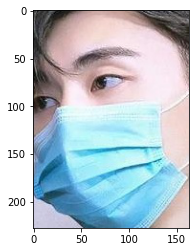

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

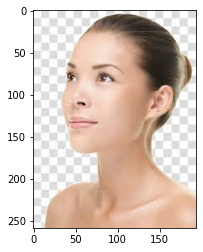

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[230, 218, 255],
        [227, 214, 255],
        [221, 208, 255],
        ...,
        [239, 235, 252],
        [238, 234, 251],
        [237, 233, 250]],

       [[229, 217, 255],
        [226, 213, 255],
        [221, 207, 255],
        ...,
        [239, 234, 252],
        [238, 234, 251],
        [238, 233, 250]],

       [[228, 216, 254],
        [225, 212, 255],
        [219, 206, 253],
        ...,
        [244, 237, 254],
        [243, 236, 253],
        [242, 235, 252]],

       ...,

       [[ 93,  29,  89],
        [ 92,  28,  89],
        [ 91,  27,  86],
        ...,
        [ 61,  50,  56],
        [ 58,  47,  53],
        [ 59,  48,  54]],

       [[ 94,  30,  92],
        [ 93,  29,  90],
        [ 92,  28,  89],
        ...,
        [ 60,  49,  55],
        [ 60,  49,  55],
        [ 63,  52,  58]],

       [[ 96,  31,  95],
        [ 95,  31,  94],
        [ 95,  31,  91],
        ...,
        [ 60,  49,  55],
        [ 64,  53,  59],
        [ 67,  56,  62]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 252, 255],
        [252, 249, 252],
        [252, 251, 255],
        ...,
        [249, 236, 242],
        [252, 245, 249],
        [252, 251, 252]],

       [[251, 251, 253],
        [254, 250, 254],
        [255, 250, 254],
        ...,
        [237, 222, 227],
        [247, 236, 240],
        [253, 251, 251]],

       [[245, 253, 253],
        [249, 255, 255],
        [250, 253, 254],
        ...,
        [247, 245, 245],
        [244, 245, 245],
        [251, 252, 251]]

In [31]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.98823529, 1.        ],
        [0.98823529, 0.97647059, 0.98823529],
        [0.98823529, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 22ms/step - loss: 0.4712 - acc: 0.8032 - val_loss: 0.3157 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2957 - acc: 0.8827 - val_loss: 0.2703 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2433 - acc: 0.9051 - val_loss: 0.2478 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2089 - acc: 0.9154 - val_loss: 0.2321 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1884 - acc: 0.9266 - val_loss: 0.2702 - val_acc: 0.8876


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2842 - acc: 0.8921
Test Accuracy = 0.8921244144439697


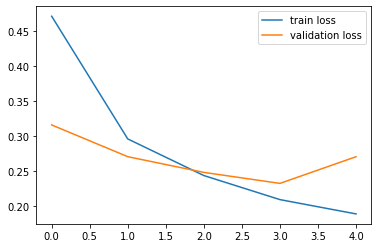

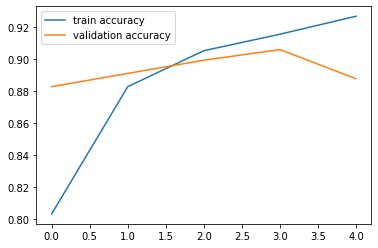

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [38]:
def Predict(input_image_path):
  #input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)
  cv2_imshow(input_image)
  input_image_resized = cv2.resize(input_image, (128,128))
  input_image_scaled = input_image_resized/255
  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)
  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)
  print(input_pred_label)


  if input_pred_label==1:  print('The person in the image is wearing a mask')
  else:                    print('The person in the image is not wearing a mask')

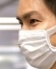

1/1 [==============================] - 0s 52ms/step
[[0.4601724 0.5132156]]
1
The person in the image is wearing a mask


In [42]:
Predict("data/with_mask/with_mask_705.jpg")